<a href="https://colab.research.google.com/github/AndreyBuyanov/Neuro-Evolutionary-Calculations/blob/main/test_cancer1_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!git clone https://github.com/AndreyBuyanov/Neuro-Evolutionary-Calculations.git

Cloning into 'Neuro-Evolutionary-Calculations'...
remote: Enumerating objects: 245, done.
remote: Counting objects: 100% (245/245), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 245 (delta 144), reused 207 (delta 109), pack-reused 0
Receiving objects: 100% (245/245), 1.57 MiB | 14.74 MiB/s, done.
Resolving deltas: 100% (144/144), done.


In [21]:
%cd Neuro-Evolutionary-Calculations

/content/Neuro-Evolutionary-Calculations/Neuro-Evolutionary-Calculations


In [22]:
!ls -la

total 388
drwxr-xr-x 4 root root  4096 Jun  1 11:04 .
drwxr-xr-x 5 root root  4096 Jun  1 11:04 ..
drwxr-xr-x 8 root root  4096 Jun  1 11:04 .git
-rw-r--r-- 1 root root     7 Jun  1 11:04 .gitignore
-rw-r--r-- 1 root root  1081 Jun  1 11:04 LICENSE
-rw-r--r-- 1 root root   115 Jun  1 11:04 README.md
-rw-r--r-- 1 root root    35 Jun  1 11:04 requirements.txt
drwxr-xr-x 3 root root  4096 Jun  1 11:04 sane
-rw-r--r-- 1 root root 96508 Jun  1 11:04 test_cancer1_Colab.ipynb
-rw-r--r-- 1 root root 92789 Jun  1 11:04 test_cancer1.ipynb
-rw-r--r-- 1 root root 31577 Jun  1 11:04 test_cancer1_tf.ipynb
-rw-r--r-- 1 root root 88876 Jun  1 11:04 test_glass1.ipynb
-rw-r--r-- 1 root root 48599 Jun  1 11:04 test_mushroom.ipynb


In [23]:
from sane import SANEAlgorithm
from sane import Cancer1Dataset
import random
import matplotlib.pyplot as plt
import time

In [24]:
random.seed(1)

Объявляем параметры алгоритма (количество комбинаций, количество нейронов, размер скрытого слоя, количество соединений на нейрон)

In [25]:
algorithm_params = [
    (10, 500, 10, 11), # полносвязная сеть для датасета cancer1 (9 входов, 2 выхода)
    #(50, 1000, 9, 8),
    #(500, 2000, 20, 8), # большие популяции, расчёт займёт около часа
]

Создаём несколько алгоритмов


In [26]:
algorithms = []
for params in algorithm_params:
    algorithms.append(SANEAlgorithm(
        blueprints_population_size=params[0],
        neuron_population_size=params[1],
        hidden_layer_size=params[2],
        connections_count=params[3]))

Инициализируем алгоритмы

In [27]:
for algorithm in algorithms:
    algorithm.init(
        min_value=-1.0,
        max_value=1.0)

Заргужаем тестовые данные

In [28]:
cancer1_dataset = Cancer1Dataset()
x_train, y_train = cancer1_dataset.get_train_data()

Запускаем алгоритмы

In [29]:
results = []
for algorithm in algorithms:
    start_time = time.time()
    result = algorithm.train(
        generations_count=2000,
        x_train=x_train,
        y_train=y_train)
    results.append(result)
    print("%s seconds" % (time.time() - start_time))

1999/2000 best fitness = 0.17736467914367268, current fitness = 0.1997802892231336

204.4616823196411 seconds


Выводим изменение среднеквадратичной ошибки (приспособленности) лучшей нейронной сети в процессе эволюции

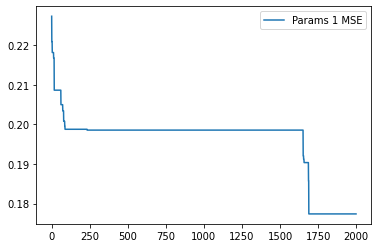

In [30]:
legend = []
for i in range(len(results)):
    plt.plot(results[i])
    legend.append("Params " + str(i+1) + " MSE")
plt.legend(legend)
plt.show()

Загружаем тестовые данные

In [31]:
x_test, y_test = cancer1_dataset.get_test_data()

Пропускаем тестовые данные через лучшие нейросети

In [32]:
results = []
for algorithm in algorithms:
    result = algorithm.test(
        x_test=x_test,
        y_test=y_test)
    results.append(result)

Выводим среднеквадратичную ошибку для каждой тестовой выборки

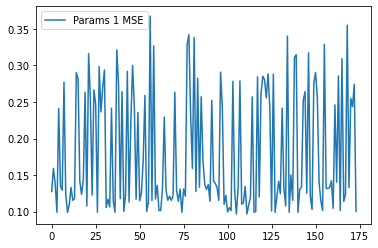

In [33]:
legend = []
for i in range(len(results)):
    plt.plot(results[i])
    legend.append("Params " + str(i+1) + " MSE")
plt.legend(legend)
plt.show()